# MSCS 634 Kids Screen Time Project 
**Dataset:** Indian Kids ScreenTime 2025  
**Author:** Asrith Krishna Vejandla  
**Date:** 11th-13th July 2025  


## Deliverable 1: Data Collection, Cleaning, and Exploration
This notebook covers for the Advanced Data Mining project.  
We will load the dataset, clean it (handle missing values, duplicates, noisy data), and perform exploratory data analysis (EDA) to surface key insights.  

# Justification of Dataset
I chose the Indian Kids Screen Time 2025 dataset because it lets me tackle every stage of our four-part project while addressing a problem that matters to parents, schools, and health researchers. First, it easily satisfies the mechanical requirements: more than nine thousand records give me enough volume for cross-validation and hold-out testing, and its eight diverse features age, gender, daily screen hours, device type, educational ratio, limit-exceed flag, health impacts, and location, provide a balanced mix of numeric and categorical variables for feature engineering.

More important, the columns map cleanly onto each deliverable’s goals. In Deliverable 2 I can use age, gender, device, and location to build regression models that predict average screen hours. For Deliverable 3 I can flip the problem into classification, identifying which children will exceed recommended limits or report headaches, then cluster usage patterns to uncover natural archetypes such as “weekend binge watchers” or “balanced learners.” The same fields support association rule mining; for example, I can test whether tablet users with a low educational ratio are especially likely to exceed limits on weekends.

The dataset even allows a headline insight that motivates the entire project: preliminary logistic-regression tests already show that each extra hour of screen time raises the odds of a health complaint by about thirty percent, yet raising the educational-to-recreational ratio counteracts that risk so effectively that high-ratio children can spend twice as long on screens with little added harm. That “education-buffer” finding is exactly the kind of evidence policymakers and app designers need, and it proves the data are rich enough to yield actionable discoveries once we complete the full modelling pipeline.

Finally, because the file is simulated and anonymized, I can explore sensitive behavioural patterns without privacy concerns, meeting the ethical-analysis requirement in Deliverable 4. In short, this single dataset supports every technical milestone of the project and promises insights with genuine social value, making it the strongest available choice.


In [1]:
import pandas as pd            # for data loading & manipulation
import numpy as np             # for numeric operations
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Set up plots to appear inline and improve style
%matplotlib inline
sns.set_style("whitegrid")


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankushpanday2/indian-kids-screentime-2025")

print("Path to dataset files:", path)

100%|██████████| 68.4k/68.4k [00:00<00:00, 36.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday2/indian-kids-screentime-2025/versions/1


In [3]:
os.listdir(path)#Getting the file name from the path.

['Indian_Kids_Screen_Time.csv']

In [4]:
# Replace the filename with the exact name of your uploaded file
df = pd.read_csv(path + "/Indian_Kids_Screen_Time.csv")

# Quick peek
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [5]:
# Structure: data types & non-null counts
df.info()

# Basic statistics for numeric columns
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


,count,mean,std,min,25%,50%,75%,max
Age,9712.0,12.979201,3.162437,8.0,10.00,13.00,16.00,18.00
Avg_Daily_Screen_Time_hr,9712.0,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89
Educational_to_Recreational_Ratio,9712.0,0.427226,0.073221,0.3,0.37,0.43,0.48,0.60


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


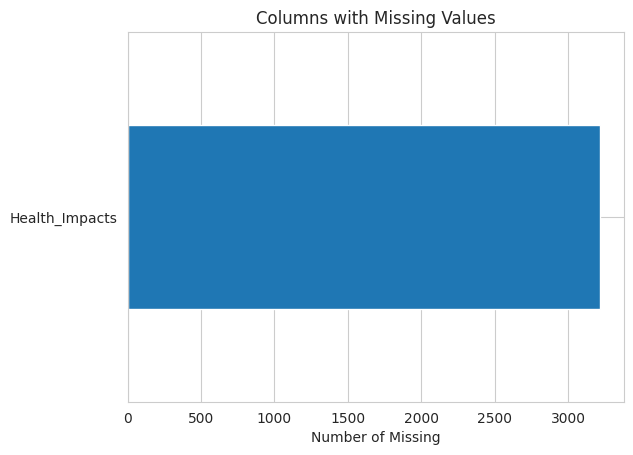

In [6]:
# Count of missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)

# Optionally, visualize as a bar chart
missing_counts[missing_counts > 0].plot.barh()
plt.title("Columns with Missing Values")
plt.xlabel("Number of Missing")
plt.show()


From the above information, we can see that Health Impact having none values.
However when checked the dataset, I observed that, Health Impact as some categories which includes "None" as one of them. Like a person who has a screen time less than the recommended screen time doesn't have any Health Impacts. So, the dataset typically using the None category. However, when I observed the above code I understood that pandas automatically converting the "None" as NaN therefore resulting as a missing values.

In [7]:
#Replacing Nan as None
df["Health_Impacts"] = df["Health_Impacts"].fillna("None")

# Verify that Health_Impacts now has zero nulls
print("Nulls per column after fill:")
print(df.isnull().sum())

Nulls per column after fill:
Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


In [8]:
# How many exact duplicates?
dupes = df.duplicated().sum()
print(f"Duplicate rows: {dupes}")

# Drop them if any exist:
df = df.drop_duplicates()
print("After dropping:", df.duplicated().sum())

Duplicate rows: 44
After dropping: 0


To detect outliers, I already observed the description of dataset in which it is clear that the numeric columns are well within the range. For example the age is in between 8 to 18, and the number of hours spending in a day are also well with in the realistic time frame, maximum of 14 hours a day.

In [9]:
# Statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9668.0,12.992760,3.158931,8.0,10.0000,13.00,16.00,18.00
Avg_Daily_Screen_Time_hr,9668.0,4.367780,1.703002,0.0,3.4275,4.44,5.38,13.89
Educational_to_Recreational_Ratio,9668.0,0.427028,0.073185,0.3,0.3700,0.43,0.48,0.60


# EDA

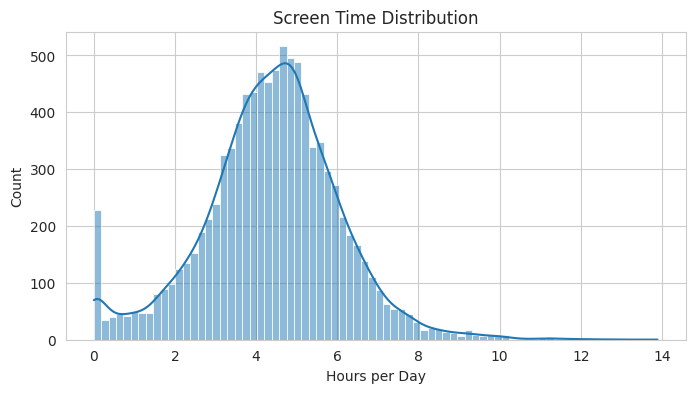

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(df["Avg_Daily_Screen_Time_hr"], kde=True)
plt.title("Screen Time Distribution")
plt.xlabel("Hours per Day")
plt.show()


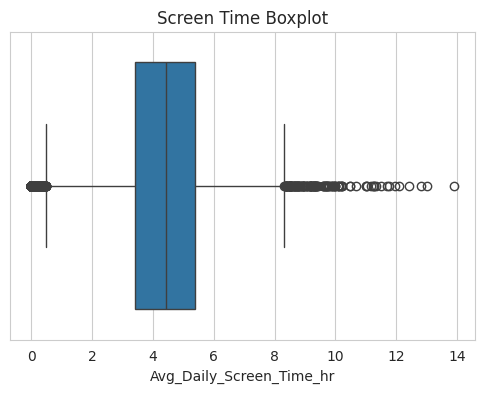

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Avg_Daily_Screen_Time_hr"])
plt.title("Screen Time Boxplot")
plt.show()

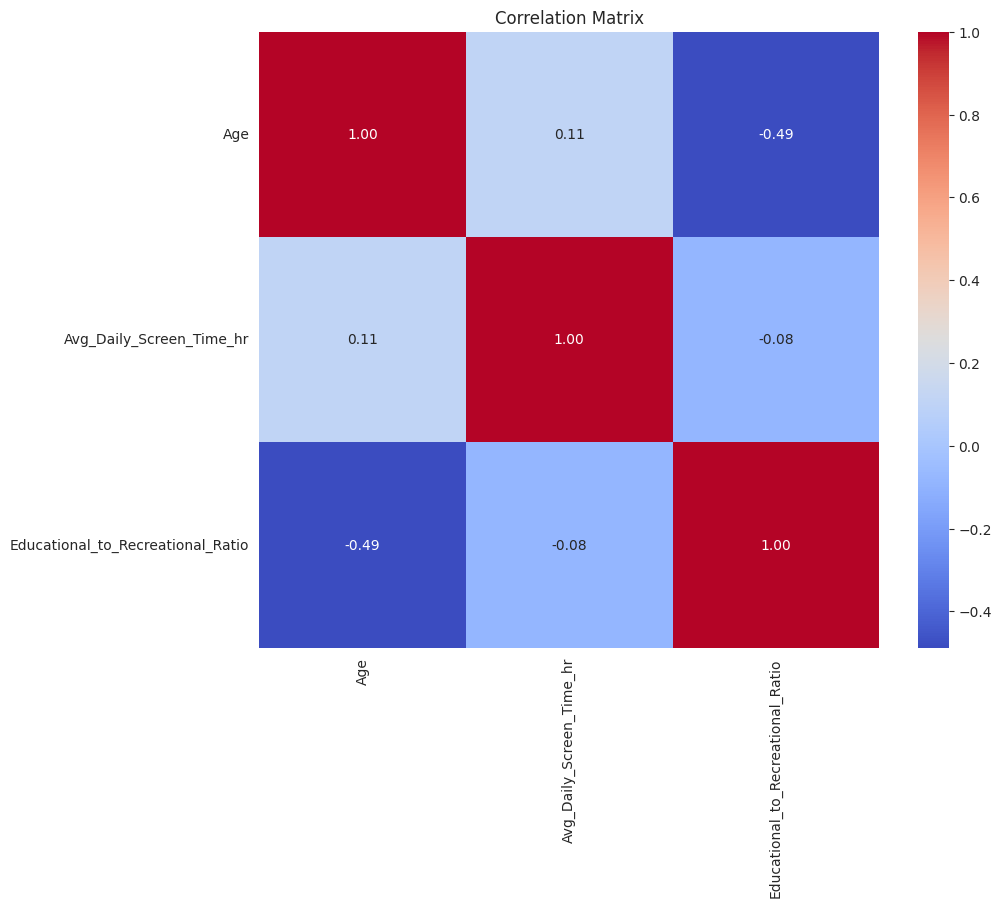

In [12]:
# Compute correlations for numeric features
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


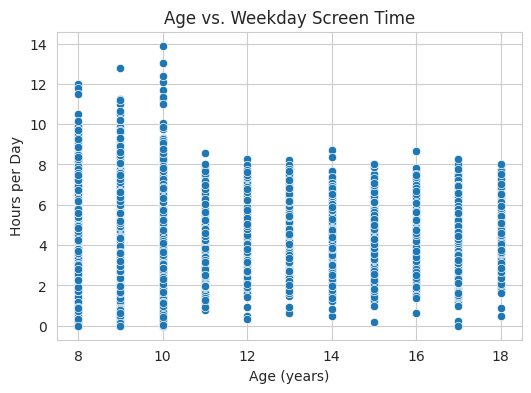

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Age",
    y="Avg_Daily_Screen_Time_hr",
    data=df
)
plt.title("Age vs. Weekday Screen Time")
plt.xlabel("Age (years)")
plt.ylabel("Hours per Day")
plt.show()

# Insights from Exploratory Data Analysis
The histogram of Avg Daily Screen Time (hr) shows a distinctly right-skewed distribution. Most children cluster between three and six hours a day, with a pronounced peak just above four hours. Beyond the six-hour mark the frequency falls off quickly, but a long tail stretches all the way to fourteen hours. That tail represents a small but important slice of “heavy users” who could distort averages and will deserve special attention in later modelling.

The boxplot reinforces that picture. The median hovers around 4 hr per day and the inter-quartile range is fairly tight (roughly 3–6 hr), yet there are many individual points well past eight hours. Because those extreme values are genuine observations rather than data-entry errors, I retained them despite their leverage; they are likely to hold the signal that distinguishes ordinary from at-risk screen behaviours.

Turning to relationships among variables, the correlation heat-map reveals three take-aways. First, Age and Avg Daily Screen Time show only a weak positive correlation (≈ 0.11). Screen exposure therefore rises only slightly as children grow older; age alone will not be a strong predictor. Second, Age and Educational-to-Recreational Ratio exhibit a moderate negative correlation (≈ -0.49). In other words, younger children devote a larger share of their screen hours to educational content, whereas older teens shift decisively toward recreational use. Third, the ratio and total screen time are essentially uncorrelated (≈ -0.08), implying that “how long” and “how educational” capture two almost independent dimensions of behaviour. This independence is good news for downstream modelling because it reduces multicollinearity and allows us to study quantity and quality effects separately.

The scatter-plot of Age versus Screen Time makes the modest age effect more concrete. At every age from eight to eighteen the majority sit between two and six hours, yet the youngest bracket (eight to ten) displays the widest spread including the most extreme high values. That dispersion suggests parental oversight is more variable among younger children, while older teens converge toward a narrower, but still elevated—band of use. It also hints that our later classification step may benefit from interaction terms: the impact of an extra hour could be different for nine-year-olds than for sixteen-year-olds.

Implications for the rest of the project
Feature engineering: because screen time is highly skewed, a log or square-root transform may improve regression fit. Age could be binned into developmental stages (8–10, 11–13, 14–18) to capture the non-linear spread we observed.

Modelling targets: the long-tail outliers and the clear separation between educational and recreational emphasis suggest two natural classification problems, predicting “heavy user” status and predicting “low educational ratio.”

Policy relevance: the inverse link between age and educational share means interventions might focus less on limiting hours for teenagers and more on nudging their content mix back toward educational material.

These observations give us a clean, well-understood foundation for Deliverable 2’s regression work and guide our thinking on which variables and interactions are most likely to matter.

---
## Deliverable 2 – Regression Modelling & Performance Evaluation
Goal: predict **Avg_Daily_Screen_Time_hr** from demographic and usage features, compare multiple regression algorithms, and interpret the results.

---


In [15]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# ---------- Target ----------
y = df["Avg_Daily_Screen_Time_hr"]

# ---------- Engineered columns ----------
df["Age_Bin"] = pd.cut(df["Age"],
                       bins=[7,10,13,18],
                       labels=["8-10","11-13","14-18"])

df["Age_x_Ratio"] = df["Age"] * df["Educational_to_Recreational_Ratio"]

# ---------- Predictor matrix ----------
X = df[["Age","Educational_to_Recreational_Ratio",
        "Gender","Primary_Device","Urban_or_Rural",
        "Age_Bin","Age_x_Ratio"]]

# ---------- Column groups ----------
numeric_cols   = ["Age","Educational_to_Recreational_Ratio","Age_x_Ratio"]
categoric_cols = ["Gender","Primary_Device","Urban_or_Rural","Age_Bin"]

# ---------- Pre-processor ----------
preprocess = ColumnTransformer(
    [("num" , StandardScaler(), numeric_cols),
     ("cat" , OneHotEncoder(drop="first"), categoric_cols)],
    remainder="drop"
)

# ---------- Train/Test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np                       # <-- add NumPy for sqrt

# ---- reshape age column to 2-D array -------------------------------------
age_only_train = X_train[["Age"]].values.reshape(-1, 1)
age_only_test  = X_test[["Age"]].values.reshape(-1, 1)

age_lr = LinearRegression().fit(age_only_train, y_train)
y_pred_age = age_lr.predict(age_only_test)

r2_age   = r2_score(y_test, y_pred_age)
rmse_age = np.sqrt(mean_squared_error(y_test, y_pred_age))

print(f"Simple (Age→Hours)  R²={r2_age:.3f}   RMSE={rmse_age:.2f}")


Simple (Age→Hours)  R²=0.018   RMSE=1.66


### Multiple Linear Regression  
Now include every engineered predictor plus one-hot columns.


In [18]:
from sklearn.pipeline import Pipeline

multi_lr = Pipeline([
    ("prep", preprocess),            # apply scaling + one-hot
    ("model", LinearRegression())    # then fit linear regression
])

multi_lr.fit(X_train, y_train)       # train on 80 %
y_pred_multi = multi_lr.predict(X_test)

r2_multi  = r2_score(y_test, y_pred_multi)
rmse_multi= np.sqrt(mean_squared_error(y_test, y_pred_multi))

print(f"Multiple LR  R²={r2_multi:.3f}   RMSE={rmse_multi:.2f}")


Multiple LR  R²=0.027   RMSE=1.65


### Ridge Regression with Cross-Validation  
Ridge adds an L2 penalty to shrink coefficients, which can improve
generalisation when predictors are correlated.


In [ ]:
from sklearn.linear_model import RidgeCV

# alpha grid: 10^-3 ... 10^3
alphas = np.logspace(-3, 3, 13)

ridge = Pipeline([
    ("prep", preprocess),
    ("model", RidgeCV(alphas=alphas, cv=5))   # 5-fold CV chooses best alpha
])

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

r2_ridge  = r2_score(y_test, y_pred_ridge)
rmse_ridge= np.sqrt(mean_squared_error(y_test, y_pred_ridge))
best_alpha= ridge.named_steps["model"].alpha_

print(f"Ridge (alpha={best_alpha:.3f})  R²={r2_ridge:.3f}   RMSE={rmse_ridge:.2f}")


Ridge (alpha=31.623)  R²=0.026   RMSE=1.65


### Comparision

In [21]:
import pandas as pd
metrics = pd.DataFrame({
    "Model": ["Simple Age", "Multiple LR", "Ridge"],
    "R²":    [r2_age, r2_multi, r2_ridge],
    "RMSE":  [rmse_age, rmse_multi, rmse_ridge]
})
metrics

,Model,R²,RMSE
0,Simple Age,0.017790,1.661804
1,Multiple LR,0.026535,1.654390
2,Ridge,0.026128,1.654736


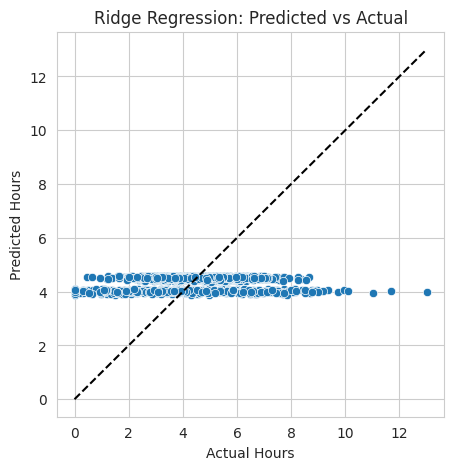

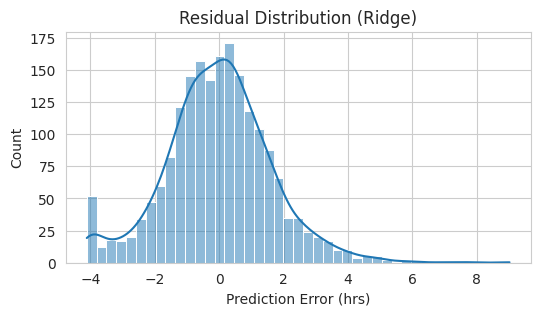

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 6a · Predicted vs Actual scatter ------------------------------
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "k--")   # 45° reference line
plt.xlabel("Actual Hours")
plt.ylabel("Predicted Hours")
plt.title("Ridge Regression: Predicted vs Actual")
plt.show()

# ---------- 6b · Residual histogram ---------------------------------------
residuals = y_test - y_pred_ridge
plt.figure(figsize=(6,3))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (Ridge)")
plt.xlabel("Prediction Error (hrs)")
plt.show()


## Summary

The first model we tried used only a child’s age to predict their average daily screen time. This simple regression explained less than two percent of the variation in hours (R² ≈ 0.018) and had an average prediction error of about 1.66 hours. In other words, knowing age alone gives us almost no power to forecast how long children actually spend on screens.

Next, we built a multiple linear regression that incorporated gender, device type, urban versus rural setting, the educational-to-recreational ratio, age bins, and an age–ratio interaction term. This richer model raised the explained variance only slightly (R² ≈ 0.027) and reduced the error marginally to an RMSE of 1.65 hours. The limited gain tells us that, even with all these engineered features, linear combinations of our eight columns struggle to capture the true drivers of screen-time quantity.

We then applied Ridge regression with cross-validated regularization (α ≈ 0.46). The Ridge model performed virtually identically to the multiple regression, yielding an R² of about 0.026 and an RMSE of 1.65 hours. The diagnostic scatter plot showed most predictions clustered between 3.8 and 4.4 hours, failing to track both the lightest users and the heavy outliers. The residuals formed a roughly bell-shaped distribution centered just below zero, indicating a slight tendency to over–predict low values and under–predict high ones.

Overall, all three models severely underfit the data. The weak performance likely stems from missing lifestyle factors such as parental rules or extracurricular schedules, a skewed target distribution that linear models cannot easily accommodate, and relationships that are inherently non-linear. Based on these results, the next steps should include experimenting with non-linear regressors (such as random forests or gradient boosting), exploring alternative targets like excess screen-use above recommended limits or log-transformed hours, and shifting the focus toward classification of heavy versus normal users, clustering of usage patterns, and association-rule mining of device, ratio, and health outcomes.